In [45]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
df=pd.DataFrame(np.random.randn(5,3),
               columns=['c1','c2','c3']) 
# 5행 3열 15개 data 도출

In [8]:
df

,c1,c2,c3
0,0.975454,0.745949,-1.359714
1,0.092941,0.268350,0.740736
2,-0.463219,-0.903586,-0.186655
3,-0.175135,-1.048353,-1.339501
4,-0.120908,-0.664694,-1.290344


In [20]:
dfdate=['07/3/2019','07/4/2019','07/5/2019','07/10/2019']
dfdate
myDate=pd.to_datetime(dfdate)
myDate
# 문자열 데이터로 자동저장되어짐
# 년 월 일 형태로 따로 인식하는 .to_datetime (날짜형식)

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-10'], dtype='datetime64[ns]', freq=None)

In [21]:
times = Series([1, np.nan, np.nan ,20], index=myDate)
times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-10    20.0
dtype: float64

In [22]:
# 보간법(interpolate)
ti=times.interpolate()
ti
# 선형적으로 비례함

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-10    20.000000
dtype: float64

In [23]:
times.interpolate(method="time")
# 행 index가 시계열 데이터일때 가능한 옵션 
# 시간의 흐름에 따라 적절히 배분하여 보간

2019-07-03     1.000000
2019-07-04     3.714286
2019-07-05     6.428571
2019-07-10    20.000000
dtype: float64

In [32]:
df=DataFrame({'c1':[1,2,np.nan,np.nan,5],
          'c2':[6,8,10,np.nan,20]})
# datafram = 딕셔너리 형태로 만듬

In [33]:
df.interpolate(method='values')

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,4.0,15.0
4,5.0,20.0


In [34]:
df.interpolate(method='values', limit=1, limit_direction='backward')
# limit = 1 : 한개만 바꾸겠다
# 기본설정은 forward이므로 backward로 변경

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [35]:
s=Series([1,2,3,4,np.nan])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [38]:
s.replace(np.nan, 10)
s.replace(3,100)
# nan 처리 가능 (다른수로 대체)

0      1.0
1      2.0
2    100.0
3      4.0
4      NaN
dtype: float64

In [40]:
s.replace([1,2,3],[5,6,7])
# 리스트로 하면 해당위치에 딱맞춰 변경
s.replace({1:10, np.nan:999})
# 딕셔너리
# s에 대해서 replace한다 

0     10.0
1      2.0
2      3.0
3      4.0
4    999.0
dtype: float64

In [52]:
# 중복값 확인 => 중복값 처리 
# 수집된 데이터 병합 => 중복 데이터 생성 // unique key로 data관리 
df=pd.DataFrame({'k1':['a','b','b','c','c'],
             'k2':['v','w','w','x','y'],
             'c':[1,2,3,4,5]})
df

# 'k1' OR 'k2' 가 주키가 될수 없다 (유일키 unique key)


,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
k1    5 non-null object
k2    5 non-null object
c     5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [54]:
display(df)
df.duplicated(['k1'])
df.duplicated(['k1','k2'])
# 기준이 되는 키 입력 (대괄호안에)

,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


0    False
1    False
2     True
3    False
4    False
dtype: bool

In [55]:
df.duplicated(['k1'])
df.duplicated(['k1'], keep='first') # default

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [56]:
df.duplicated(['k1'], keep='last')

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [57]:
df.duplicated(['k1'], keep=False)
# 모두 날려버리겠다

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [60]:
df

,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [61]:
df.drop_duplicates(['k1'])
# drop : 제거 관련함수
# 중복을 제거한다
# 나중에 나온것들이 제거되고 먼저나온것들은 살았다

,k1,k2,c
0,a,v,1
1,b,w,2
3,c,x,4


In [62]:
df.drop_duplicates(['k1'],keep='first') # default

,k1,k2,c
0,a,v,1
1,b,w,2
3,c,x,4


In [63]:
df.drop_duplicates(['k1'],keep='last') 
# 나중에 나온것을 살린다

,k1,k2,c
0,a,v,1
2,b,w,3
4,c,y,5


In [64]:
df.drop_duplicates(['k1'],keep=False) 
#

,k1,k2,c
0,a,v,1


In [65]:
df=pd.DataFrame({
    's':['f','m','m','f','m'],
    'd':['a','a','a','a',np.nan],
    'c':[1,1,3,4,4]})
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
s    5 non-null object
d    4 non-null object
c    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [67]:
df['s'].unique()
# column 기준

array(['f', 'm'], dtype=object)

In [68]:
df['d'].unique()

array(['a', nan], dtype=object)

In [69]:
# 각각의 데이터마다 몇건이 있는지 ==> value count 함수 => 대상이 series 여야한다
# df에서 열벡터만 정렬 => series
# df.unique() => error발생 // 해당 열벡터를 지정해줘야한다
# 클래스 & 객체
# ==> 붕어빵기계 & 붕어빵 
# ==> df 객체 (dataframe : 붕어빵기계 class )


In [70]:
type(df)

pandas.core.frame.DataFrame

In [71]:
type(df['s'])

pandas.core.series.Series

In [72]:
df.values

array([['f', 'a', 1],
       ['m', 'a', 1],
       ['m', 'a', 3],
       ['f', 'a', 4],
       ['m', nan, 4]], dtype=object)

In [73]:
df['s'].values
# 해당열에 대한 값들만 참조 반환됨

array(['f', 'm', 'm', 'f', 'm'], dtype=object)

In [75]:
df['s'].value_counts()
# 해당 함수는 시리즈 벡터에 관해서만 실행된다
# df 붕어빵 df['s']:자동차 value_counts():달린다
# df.value_counts(): 말이 안됨
# df['s'].value_counts(): 말이 됨

m    3
f    2
Name: s, dtype: int64

In [76]:
df['d'].value_counts()
# Nan은 안나옴


a    4
Name: d, dtype: int64

In [77]:
df['s'].value_counts(normalize=True)
# 비율로 출력하고자하는 함수 옵션

m    0.6
f    0.4
Name: s, dtype: float64

In [78]:
df['c']

0    1
1    1
2    3
3    4
4    4
Name: c, dtype: int64

In [79]:
df['c'].value_counts(sort=True)
# 개수에 따라 내림차수 정렬(default)

4    2
1    2
3    1
Name: c, dtype: int64

In [81]:
df['c'].value_counts(sort=True, ascending=False)


4    2
1    2
3    1
Name: c, dtype: int64

In [82]:
df['c'].value_counts(sort=True, ascending=True)
# 오름차순 정렬 ( 개수에 따라 )
# titanic ) Mr, Mrs, Miss Dr. => 분류한뒤 상위 10개 추출 에 적용가능한 속성

3    1
1    2
4    2
Name: c, dtype: int64

In [83]:
df['d'].value_counts()
# NaN 값은 합계도출되지 않는다 

a    4
Name: d, dtype: int64

In [84]:
# # NaN 값은 합계도출하고 싶을 때 옵션 drop NA 사용
df['d'].value_counts(dropna=True) # default

a    4
Name: d, dtype: int64

In [85]:
df['d'].value_counts(dropna=False) 
# NaN 포함되어 도출

a      4
NaN    1
Name: d, dtype: int64

In [86]:
# 구간별로 분류해서 데이터 추출 경우
# 세데별 인구 통계 추출 ( option : bins)
# 연속형변수에 대해 사용이 가능하다 
# 기존의 것들은 범주형 변수였음
# 구간별 데이터 건수를 조사하라 
# titanic 데이터 // age열에 따른 데이터 반별에 따라 생존율 결정되는 모델링 과정 진행시
# age 열 나이대별 구간 분간의 필요성이 존재 // ex) 10, 20, 30대 ...

# 캐글> 타이타닉> 호칭> 호칭별> 건수> 소트> 상위 10개호칭 조사 
# 나이(age)> 구간화> 구간별건수> 소트> 출력 [matplob.lib]


In [87]:
# 오전수업
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [88]:
df['c'].value_counts()
# 내림차순 정리 도출

4    2
1    2
3    1
Name: c, dtype: int64

In [91]:
df['c'].value_counts(sort=False,bins=[0,1,2,3,4])
# 소괄호 : 개구간 
# 대괄호 : 폐구간
# => 0~1 1~4
# => 1초과 2이하 | 0 건
# => 3초과 4이하 | 2 건


(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
Name: c, dtype: int64

In [92]:
pd.cut(df['c'], bins=[0,1,2,3,4])
# 말그대로 짜른다
# count는 안하고 구간만 나눠준다.

0    (0, 1]
1    (0, 1]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: c, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

In [93]:
# cut 이후 value_counts 하는게 일반적 작업순서
res=pd.cut(df['c'], bins=[0,1,2,3,4])
pd.value_counts(res)
# 각 구간 별로 몇 건수가 있는지 확인가능

(3, 4]    2
(0, 1]    2
(2, 3]    1
(1, 2]    0
Name: c, dtype: int64

In [94]:
# 기술통계 // 주로 많이 다루는것 : 중심경향치 (중심으로 얼마나 많이 모여있느냐)
# 중심경향치 : 평균, 중앙값(극단치에 의해 평균값이 왜곡되는 현상을 피하기위해), 최빈수 
# 정규분포, 선형변환, 표준정규분포


In [101]:
data=np.random.randint(20, size=(6,5))
# randint : 정수 난수 생성 
data
    

array([[ 6,  3, 11, 19, 17],
       [ 6, 12, 11,  6,  7],
       [13, 17,  8,  3, 17],
       [ 2,  7, 17,  8, 19],
       [14, 11,  2,  2,  5],
       [18,  5, 13, 11, 14]])

In [109]:
from numpy import *
#1. numpy 표준화
print(mean(data)) 
# 전체평균
print(data)
#표준화:(각 열의 데이터 - 각 열의 평균) / (각 열의 = axis) 표준편차 (전체 표준편차 x)
# z = (x - mean()) / std()
print(mean(data, axis=0))
print("="*50)
std_data = (data-mean(data, axis=0)) / std(data,axis=0)
# 여까지 분자 부분 // 분모부분


10.133333333333333
[[ 6  3 11 19 17]
 [ 6 12 11  6  7]
 [13 17  8  3 17]
 [ 2  7 17  8 19]
 [14 11  2  2  5]
 [18  5 13 11 14]]
[ 9.83333333  9.16666667 10.33333333  8.16666667 13.16666667]


In [110]:
std_data


array([[-0.69065644, -1.31060724,  0.14471492,  1.90110499,  0.72264186],
       [-0.69065644,  0.60217089,  0.14471492, -0.380221  , -1.16251081],
       [ 0.57054227,  1.66482542, -0.50650222, -0.90668084,  0.72264186],
       [-1.41134141, -0.46048363,  1.44714921, -0.02924777,  1.09967239],
       [ 0.75071352,  0.38963999, -1.80893651, -1.08216745, -1.53954135],
       [ 1.47139849, -0.88554543,  0.57885968,  0.49721207,  0.15709606]])

In [111]:
mean(std_data, axis=0)
# 처음 숫자 = 0 (정밀도 때문에 저렇게 도출됨)
# numpy 버전으로 표준화하는것 

array([-1.11022302e-16,  1.29526020e-16, -9.25185854e-17,  1.20274161e-16,
        1.06396373e-16])

In [112]:
std(std_data, axis=0)

array([1., 1., 1., 1., 1.])

In [115]:
import scipy.stats as ss
std_data=ss.zscore(data)
std_data

array([[-0.69065644, -1.31060724,  0.14471492,  1.90110499,  0.72264186],
       [-0.69065644,  0.60217089,  0.14471492, -0.380221  , -1.16251081],
       [ 0.57054227,  1.66482542, -0.50650222, -0.90668084,  0.72264186],
       [-1.41134141, -0.46048363,  1.44714921, -0.02924777,  1.09967239],
       [ 0.75071352,  0.38963999, -1.80893651, -1.08216745, -1.53954135],
       [ 1.47139849, -0.88554543,  0.57885968,  0.49721207,  0.15709606]])

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
StandardScaler()
# 객체 생성 => 함수 사용 가능

StandardScaler(copy=True, with_mean=True, with_std=True)

In [119]:
std_data=StandardScaler().fit_transform(data)
std_data
# 데이터가 이상치(특이값, outliar)가 없다는 가정아래 작업을 수행한다
# 이상치 데이터제거로 인해 해당 데이터셋까지 삭제되는 경우 발생하므로, 
# 이상치 제거가 정답은 아니다
# ex) 근로자 연봉에 관한 데이터 // 이상치인 천억부자의 데이터 삭제 시 
# 그의 연봉이 아닌 다른 데이터에 대한 삭제가 함께 이루어지는 경우는 피해야한다


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.69065644, -1.31060724,  0.14471492,  1.90110499,  0.72264186],
       [-0.69065644,  0.60217089,  0.14471492, -0.380221  , -1.16251081],
       [ 0.57054227,  1.66482542, -0.50650222, -0.90668084,  0.72264186],
       [-1.41134141, -0.46048363,  1.44714921, -0.02924777,  1.09967239],
       [ 0.75071352,  0.38963999, -1.80893651, -1.08216745, -1.53954135],
       [ 1.47139849, -0.88554543,  0.57885968,  0.49721207,  0.15709606]])

In [120]:
# 이상치, 특이값이 포함되어있는 데이터의 표준화
# 평균, 표준편차는 이상치의 영향을 크게받음(민감함)
# 중앙값 
# 표준편차 IQR(Q3-Q1) : 데이터 오름차순 정렬시, Q1:25%, Q2:50% (중앙값), Q3: 75%
# -> robustscaler = x-median() / IQR

10.147389546015

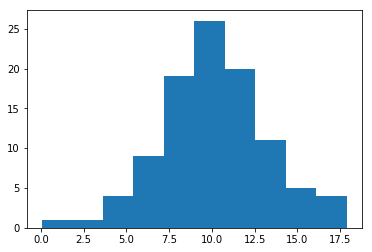

In [124]:
np.random.seed(73)
# 동일한 씨를 사용하면 동일한 열매 나온다
# nano.second 단위로 난수 생성 // 시스템 설정시간에 따라 반환하므로 수 지정해주면 같은 난수 발생한다
# ==> seed를 동일하게 설정하면 같은 난수배열 생성
# 동일하게 줘야 비교가 가능하다[random num]
mu,sigma = 10, 3 
# (평균. 표준편차)
x=mu+sigma*np.random.randn(100)
x
import matplotlib.pyplot as plt
plt.hist(x)
mean(x)
# plt.show // pycharm

In [125]:
mean(x)

10.147389546015

In [126]:
std(x)

3.014695610662603

In [129]:
x[95:100]=100
x
# +02 : 10 제곱

array([1.17304392e+01, 1.63933264e+01, 1.73206590e+01, 1.07899806e+01,
       5.51163806e+00, 9.88979408e+00, 1.12920874e+01, 5.41157701e+00,
       7.80922097e+00, 1.31539457e+01, 1.48593780e+01, 5.18495989e+00,
       1.09930286e+01, 9.36714293e+00, 1.08945301e+01, 6.56177945e+00,
       1.17260861e+01, 8.90828010e+00, 1.01091976e+01, 8.43830804e+00,
       9.95270700e+00, 9.86247581e+00, 8.14476643e+00, 7.54049167e+00,
       1.15294257e+01, 1.31518183e+01, 1.04350957e+01, 8.97743181e+00,
       1.37323753e+01, 1.49674550e+01, 9.18100947e+00, 8.92022193e+00,
       7.33842885e-02, 1.31550968e+01, 9.32104691e+00, 8.01247213e+00,
       1.27391756e+01, 1.27635065e+01, 1.27163572e+01, 8.54749669e+00,
       7.85535142e+00, 1.05471619e+01, 1.17301502e+01, 5.30930238e+00,
       1.56590461e+01, 6.80288206e+00, 1.03384932e+01, 8.23193967e+00,
       1.19328003e+01, 1.09154191e+01, 1.18521557e+01, 1.32972652e+01,
       8.69230361e+00, 1.11955065e+01, 1.00184890e+01, 4.93669823e+00,
      

In [130]:
mean(x)

14.717851743813155

In [131]:
std(x)

19.790826557586872

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([7.33842885e-02, 1.00660459e+01, 2.00587074e+01, 3.00513690e+01,
        4.00440306e+01, 5.00366921e+01, 6.00293537e+01, 7.00220153e+01,
        8.00146769e+01, 9.00073384e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

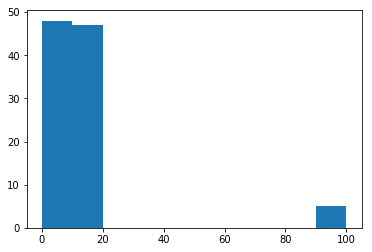

In [135]:
# std(x) => 분모로 자리잡음 // 10에[ 비해 매우 큰 변화 이므로 이상치 제거해줘야함]
plt.hist(x)

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

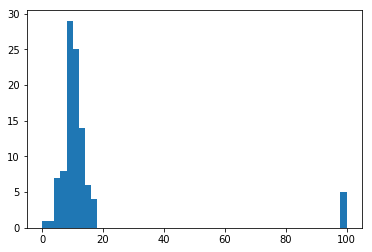

In [137]:
plt.hist(x,bins=np.arange(0,101,2))

In [147]:
print(np.shape(x))
x=x.reshape(-1,1)
x
## 1: 니가 알아서 계산해
# DL : -1 => None
# print(np.shape(x))
std_x=StandardScaler().fit_transform(x)

(100, 1)


(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-0.7399624 , -0.23504859,  0.26986522,  0.77477902,  1.27969283,
         1.78460664,  2.28952044,  2.79443425,  3.29934806,  3.80426186,
         4.30917567]),
 <a list of 10 Patch objects>)

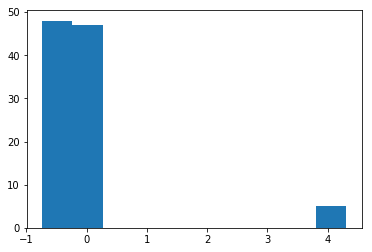

In [148]:
plt.hist(std_x)

In [150]:
std_o=std_x[std_x<4]

(array([ 0.,  1.,  9., 45., 32.,  8.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

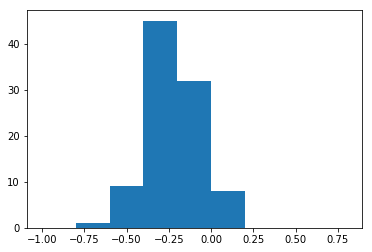

In [151]:
plt.hist(std_o, bins=np.arange(-1, 1, 0.2))


In [154]:
# numpy
mean(x)
median(x)

10.386794450839528

In [158]:
Q1=percentile(x, 25) # 8.44
# 25 % 지점 // Q1에 해당
# 백분위에서 25분위 수 탐색
Q1

8.435859129640745

In [159]:
Q3=percentile(x, 75) # 12.53
Q3

12.534014070784306

In [161]:
IQR=Q3-Q1
IQR

4.0981549411435605

In [163]:
rbs_x=RobustScaler().fit_transform(x)
# 괄호 : 함수
rbs_x

array([[ 3.27865765e-01],
       [ 1.46566736e+00],
       [ 1.69194788e+00],
       [ 9.83823630e-02],
       [-1.18959787e+00],
       [-1.21274179e-01],
       [ 2.20902557e-01],
       [-1.21401399e+00],
       [-6.28959499e-01],
       [ 6.75218799e-01],
       [ 1.09136517e+00],
       [-1.26931134e+00],
       [ 1.47928556e-01],
       [-2.48807460e-01],
       [ 1.23893718e-01],
       [-9.33350510e-01],
       [ 3.26803559e-01],
       [-3.60775612e-01],
       [-6.77370358e-02],
       [-4.75454548e-01],
       [-1.05922655e-01],
       [-1.27940169e-01],
       [-5.47082297e-01],
       [-6.94532739e-01],
       [ 2.78816023e-01],
       [ 6.74699692e-01],
       [ 1.17861007e-02],
       [-3.43901747e-01],
       [ 8.16362710e-01],
       [ 1.11773727e+00],
       [-2.94226304e-01],
       [-3.57861657e-01],
       [-2.51659840e+00],
       [ 6.75499676e-01],
       [-2.60055454e-01],
       [-5.79363727e-01],
       [ 5.74009819e-01],
       [ 5.79946854e-01],
       [ 5.6

In [165]:
# 중의수 ( 중앙에 있는 수 )
# 평균을 뺀게 아니라 중의수를 뺀값
median(rbs_x)

0.0

In [166]:
# 평균값
mean(rbs_x)

1.0568310264435923

In [167]:
# 표준편차
std(rbs_x)

4.829204078863935

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-2.5165984 , -0.07826658,  2.36006523,  4.79839704,  7.23672886,
         9.67506067, 12.11339248, 14.5517243 , 16.99005611, 19.42838793,
        21.86671974]),
 <a list of 10 Patch objects>)

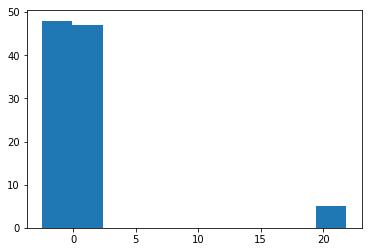

In [168]:
plt.hist(rbs_x)

In [169]:
rbs_o=rbs_x[rbs_x<5]
rbs_o


array([ 0.32786576,  1.46566736,  1.69194788,  0.09838236, -1.18959787,
       -0.12127418,  0.22090256, -1.21401399, -0.6289595 ,  0.6752188 ,
        1.09136517, -1.26931134,  0.14792856, -0.24880746,  0.12389372,
       -0.93335051,  0.32680356, -0.36077561, -0.06773704, -0.47545455,
       -0.10592265, -0.12794017, -0.5470823 , -0.69453274,  0.27881602,
        0.67469969,  0.0117861 , -0.34390175,  0.81636271,  1.11773727,
       -0.2942263 , -0.35786166, -2.5165984 ,  0.67549968, -0.26005545,
       -0.57936373,  0.57400982,  0.57994685,  0.56844185, -0.44881118,
       -0.61770311,  0.03913162,  0.32779526, -1.23897026,  1.28649398,
       -0.87451852, -0.0117861 , -0.52581096,  0.37724436,  0.12899088,
        0.3575661 ,  0.71019051, -0.41347652,  0.19733564, -0.08987105,
       -1.32989023, -0.09048712,  0.48334471,  0.33796225, -0.8526845 ,
        0.66749915, -0.57377537, -0.56286923,  0.22842607, -0.32868005,
        0.93135083,  0.04265306,  0.63028036, -0.11489976,  0.02

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,  4.,  4., 11.,
        12., 10., 11., 10.,  7.,  6.,  2.,  4.,  1.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

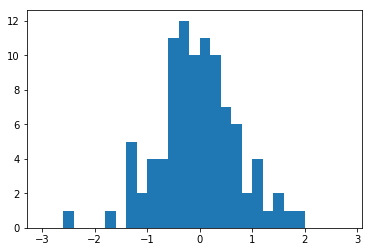

In [176]:

plt.hist(rbs_o, bins=np.arange(-3,3,0.2))

In [5]:
# 정규화 : (각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값)
# 0~1 사이의 범위(딥러닝)//(일반적)
# 연습문제 : finance.yahoo.com
# 관심회사 -> 주식데이터 다운로드(1개월) # 표준화/정규화 [scaler 함수 쓰지말고 구현]
# def myStd로 구현하라
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
x=np.array([
         [9, -9, 2],
         [5, 0, 1],
         [1, 10, 4],
         [4, 7, -2]])
# 몇 차원이냐 ? = 대괄호의 개수에 따라 판단
# min-max scaling ) 1 OR 0 로 도출 // 열단위로 결과 도출

In [8]:
x.min(axis=0) # [ 1, -9, -2]
# 열단위로 최소값

array([ 1, -9, -2])

In [9]:
x.max(axis=0)
# 열단위 최대값

array([ 9, 10,  4])

In [10]:
# 정규화 : (각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값)
(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
# min-max scaler [0~1] 사이 내재
# broadcasting (확장) 될것이다.

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [11]:
x_minmax=MinMaxScaler().fit_transform(x)
x_minmax
# 객체생성

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [12]:
from sklearn.preprocessing import minmax_scale

In [13]:
minmax_scale(x, axis=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [14]:
# 연습문제 : 이항변수화 변환(타이타닉)
# 연속형 변수값 -> 0또는 1(2가지)
from sklearn.preprocessing import Binarizer
# 이항변수화 시키는 class


In [15]:
x=np.array([[5, -3, 2],
            [7,-1,0],
            [0,9,5]])
x
# 임계값 ( threshold) 을 설정하고 이에 기준하여 binarization
# 물의 끓는점 (100'c) // 기준이 되는값 


array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [16]:
# 3을 기준 threshold
Binarizer().fit(x)
# default값 : 0.0
# 클래스 : 틀, 설계도 => 실체가 아니다 => ()를 덧붙여 실체화한다 

Binarizer(copy=True, threshold=0.0)

In [22]:
bnr=Binarizer(2).fit(x) # 2이하 -> 0 # 2초과 -> 1
bnr

Binarizer(copy=True, threshold=2)

In [23]:
bnr.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [24]:
x

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [25]:
# 20190703 수업완료